In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)




In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).all()[-1][-1]
most_recent_date

'2017-08-23'

In [10]:
last_twelve_months=dt.date(2016,8,23)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_months).\
    filter(Measurement.date <= most_recent_date).all()
                    

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data).set_index('date')

# Sort the dataframe by date
precip_df = precip_df.sort_values (by='date').dropna()
precip_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


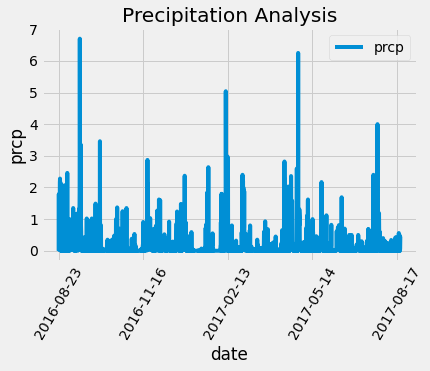

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot (rot=45)
plt.title('Precipitation Analysis')
plt.xlabel ('date')
plt.ylabel ('prcp')
plt.xticks (rotation = 60)
plt.savefig("Precipiation Analysis.png")
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the datase
Station = session.query(Station).count()
Station


9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
Active_stations

Most_Active = Active_stations[0][0]
print(f"The station with the highest number of observations was" + Most_Active + "with" + str(Active_stations[0][1]) + "observations.")
print(f"Below is a list of stations and observation counts in descending order.")
for j, i in Active_stations:
    print("The station " + " had " + str(i) + " observations.")

The station with the highest number of observations wasUSC00519281with2772observations.
Below is a list of stations and observation counts in descending order.
The station  had 2772 observations.
The station  had 2724 observations.
The station  had 2709 observations.
The station  had 2669 observations.
The station  had 2612 observations.
The station  had 2202 observations.
The station  had 1979 observations.
The station  had 1372 observations.
The station  had 511 observations.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = Most_Active
session.query (func.min(Measurement.tobs),
               func.max(Measurement.tobs),
               func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Most_Active_Station = Active_stations[0][0]

results_data = session.query(Measurement.date, Measurement.tobs).\
                             filter(Measurement.date >= last_twelve_months).\
                             filter(Measurement.date <= most_recent_date).\
                             filter(Measurement.station == Most_Active_Station).all()

results_df = pd.DataFrame(results_data)
results_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


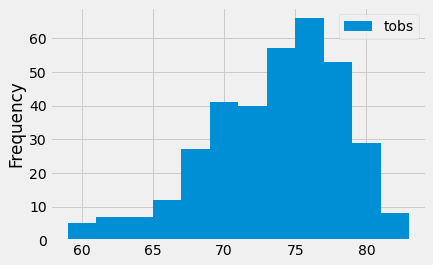

In [19]:
results_df.plot.hist(bins=12)
plt.savefig("Station Analysis.png")
plt.show()


# Close session

In [20]:
# Close Session
session.close()